In [93]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
from sklearn.model_selection import  StratifiedShuffleSplit

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20.0, 10.0)

## one KNN

In [45]:


tf.disable_eager_execution()

iris= load_iris()
rows, cols = iris.data.shape

X = iris.data
y = iris.target

class_names = iris.target_names


X_train,X_test,y_train,y_test = train_test_split(X,y)
print(X_train.shape,X_test[0,:].shape)

xtr = tf.placeholder(tf.float32,shape=(None,cols),name='xtr')
xte = tf.placeholder(tf.float32,shape=(cols),name='xte')

distance = tf.reduce_sum(tf.square(tf.subtract(xtr,xte)),axis=1)
pred = tf.math.argmin(distance,0)

accuracy = 0.

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(len(X_test)):
        nn_index = sess.run(pred,feed_dict={xtr: X_train,xte:X_test[i,:]})
        predicted = y_train[nn_index]
        true_class = y_test[i]
        print ("Test", i, "Predicton", predicted,
               "true class" , true_class)
        
        if predicted == true_class:
               accuracy += 1./len(X_test)
               
        
print('accuracy',accuracy)


(112, 4) (4,)
Test 0 Predicton 0 true class 0
Test 1 Predicton 0 true class 0
Test 2 Predicton 1 true class 1
Test 3 Predicton 0 true class 0
Test 4 Predicton 0 true class 0
Test 5 Predicton 2 true class 2
Test 6 Predicton 0 true class 0
Test 7 Predicton 0 true class 0
Test 8 Predicton 2 true class 2
Test 9 Predicton 1 true class 1
Test 10 Predicton 2 true class 2
Test 11 Predicton 2 true class 2
Test 12 Predicton 2 true class 2
Test 13 Predicton 0 true class 0
Test 14 Predicton 1 true class 1
Test 15 Predicton 0 true class 0
Test 16 Predicton 2 true class 2
Test 17 Predicton 2 true class 2
Test 18 Predicton 0 true class 0
Test 19 Predicton 1 true class 1
Test 20 Predicton 1 true class 1
Test 21 Predicton 0 true class 0
Test 22 Predicton 1 true class 1
Test 23 Predicton 1 true class 1
Test 24 Predicton 2 true class 2
Test 25 Predicton 2 true class 2
Test 26 Predicton 1 true class 1
Test 27 Predicton 0 true class 0
Test 28 Predicton 1 true class 1
Test 29 Predicton 1 true class 1
Test 3

### knn - sample from web
the idea is just memorize the entire training data and in testing time, return the label based on the labels of “k” points
closest to the query point

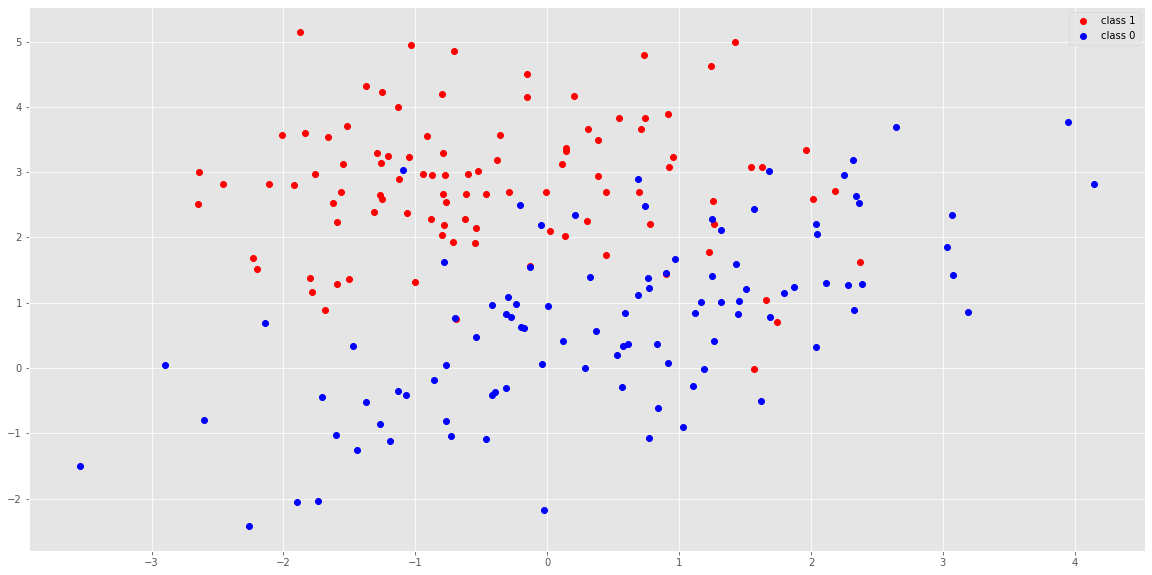

(200, 2) (200,)


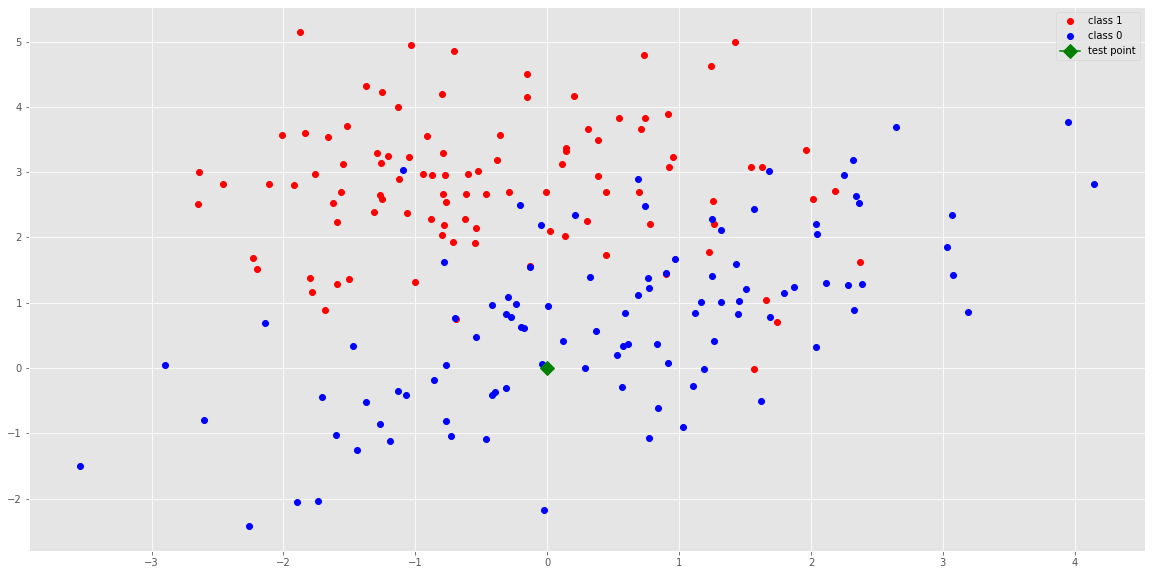

y_s Tensor("GatherV2_24:0", shape=(3,), dtype=float64)
0


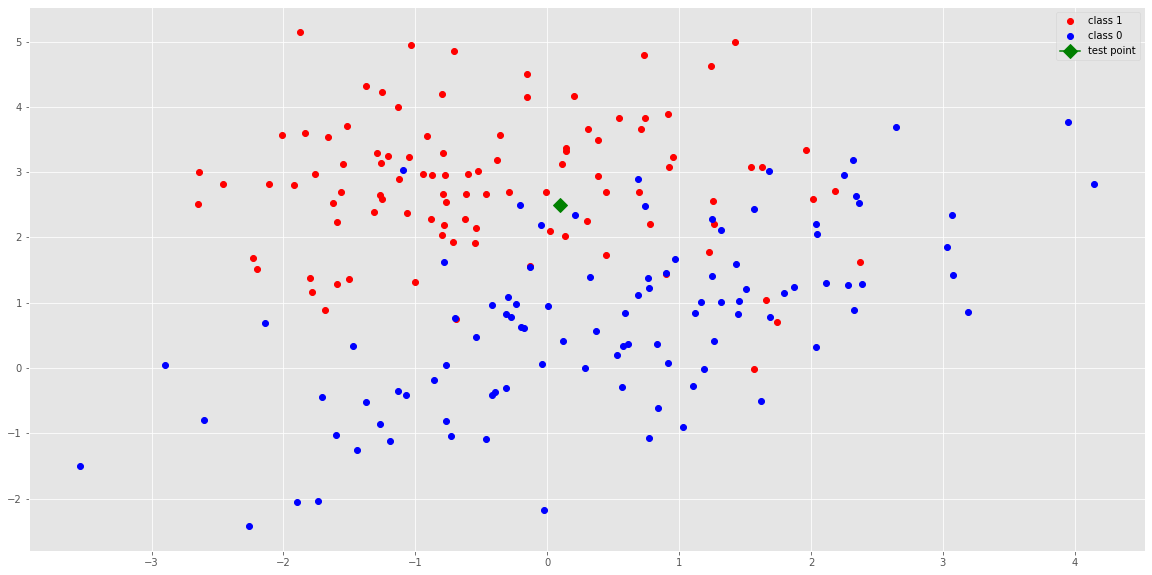

y_s Tensor("GatherV2_25:0", shape=(3,), dtype=float64)
0


In [59]:
#create synthetic data
num_points_each_cluster = 100
mu1 = [-0.4, 3]
covar1 = [[1.3,0],[0,1]]
mu2 = [0.5, 0.75]
covar2 = [[2.2,1.2],[1.8,2.1]]
X1 = np.random.multivariate_normal(mu1, covar1, num_points_each_cluster)
X2 = np.random.multivariate_normal(mu2, covar2, num_points_each_cluster)
y1 = np.ones(num_points_each_cluster)
y2 = np.zeros(num_points_each_cluster)

plt.plot(X1[:, 0], X1[:,1], 'ro', label='class 1')
plt.plot(X2[:, 0], X2[:,1], 'bo', label='class 0')
plt.legend(loc='best')
plt.show()


X = np.vstack((X1, X2))
y = np.hstack((y1, y2))
print (X.shape, y.shape)

X_tf = tf.constant(X)
y_tf = tf.constant(y)


def predict(X_t, y_t, x_t, k_t):
    neg_one = tf.constant(-1.0, dtype=tf.float64)
    # we compute the L-1 distance
    distances =  tf.reduce_sum(tf.abs(tf.subtract(X_t, x_t)), 1)
    # to find the nearest points, we find the farthest points based on negative distances
    # we need this trick because tensorflow has top_k api and no closest_k or reverse=True api
    neg_distances = tf.multiply(distances, neg_one)
    # get the indices
    vals, indx = tf.nn.top_k(neg_distances, k_t)
    # slice the labels of these points
    y_s = tf.gather(y_t, indx)
    #print('y_s',y_s)
    return y_s
    
    
def get_label(preds):
    counts = np.bincount(preds.astype('int64'))
    return np.argmax(counts)

example = np.array([0, 0])
example_tf = tf.constant(example,dtype=tf.float64)

plt.plot( X1[:, 0], X1[:,1], 'ro', label='class 1')
plt.plot(X2[:, 0], X2[:,1], 'bo', label='class 0')
plt.plot(example[0], example[1], 'g', marker='D', markersize=10, label='test point')
plt.legend(loc='best')
plt.show()

k_tf = tf.constant(3)
pr = predict(X_tf, y_tf, example_tf, k_tf)

sess = tf.Session()
y_index = sess.run(pr)
print (get_label(y_index))

example_2 = np.array([0.1, 2.5])
example_2_tf = tf.constant(example_2)
plt.plot( X1[:, 0], X1[:,1], 'ro', label='class 1')
plt.plot(X2[:, 0], X2[:,1], 'bo', label='class 0')
plt.plot(example_2[0], example_2[1], 'g', marker='D', markersize=10, label='test point')
plt.legend(loc='best')
plt.show()

pr = predict(X_tf, y_tf, example_2_tf, k_tf)
y_index = sess.run(pr)
print (get_label(y_index))

In [112]:
I = 4
B = 3
J = 5
top_k = 2
x = tf.reshape(tf.range(I * B * J), (I, B, 1, J)) % 7

# Top K
top_values, top_indices = tf.nn.top_k(x, k=top_k)
top_values, top_indices 

with tf.Session() as sess:
    
    x1, v1, v2 = sess.run([x,top_values, top_indices])
    #print(v1,v2)
    #print(x1)
    print("***************")
    print(v1)
    print("****************************")
    print(v2)

***************
[[[[4 3]]

  [[6 5]]

  [[6 5]]]


 [[[5 4]]

  [[6 3]]

  [[6 5]]]


 [[[6 5]]

  [[4 3]]

  [[6 5]]]


 [[[6 5]]

  [[5 4]]

  [[6 3]]]]
****************************
[[[[4 3]]

  [[1 0]]

  [[3 2]]]


 [[[4 3]]

  [[0 4]]

  [[2 1]]]


 [[[4 3]]

  [[4 3]]

  [[1 0]]]


 [[[3 2]]

  [[4 3]]

  [[0 4]]]]


### knn - with k neighbours

In [125]:


tf.disable_eager_execution()

iris= load_iris()
rows, cols = iris.data.shape

X = iris.data
y = iris.target

class_names = iris.target_names

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2,train_size=0.8)
train_index, test_index = next(sss.split(X=X, y=y))   

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

#X_train,X_test,y_train,y_test = train_test_split(X,y)

xtr = tf.placeholder(tf.float32,shape=(None,cols),name='xtr')
xte = tf.placeholder(tf.float32,shape=(cols),name='xte')

neg_one = tf.constant(-1.0, dtype=tf.float32)
distances = tf.reduce_sum(tf.square(tf.subtract(xtr,xte)),axis=1)
#distances =  tf.reduce_sum(tf.abs(tf.subtract(xtr, xte)), 1)

#pred = tf.math.argmin(distance,0)
neg_distances = tf.multiply(distances, neg_one)

k = tf.constant(3)
top_values, top_indices = tf.nn.top_k(neg_distances, k)
pred = tf.gather(y_train, top_indices)

accuracy = 0.

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(len(X_test)):
        predicted = sess.run(pred,feed_dict={xtr: X_train,xte:X_test[i,:]})
        #predicted = y_train[nn_index]
        counts = sess.run(tf.math.bincount(predicted.astype('int64')))
        pr = sess.run(tf.math.argmax(counts))
        
        true_class = y_test[i]
        
        print ("Test", i, "Predicton", predicted,counts,'argmax',pr,
               "true class" , true_class)

        if pr == true_class:
            accuracy += 1./len(X_test)
               
    print('accuracy',accuracy)

Test 0 Predicton [0 0 0] [3] argmax 0 true class 0
Test 1 Predicton [2 2 2] [0 0 3] argmax 2 true class 2
Test 2 Predicton [1 1 1] [0 3] argmax 1 true class 1
Test 3 Predicton [1 1 1] [0 3] argmax 1 true class 1
Test 4 Predicton [0 0 0] [3] argmax 0 true class 0
Test 5 Predicton [1 1 1] [0 3] argmax 1 true class 1
Test 6 Predicton [0 0 0] [3] argmax 0 true class 0
Test 7 Predicton [2 2 2] [0 0 3] argmax 2 true class 2
Test 8 Predicton [1 1 1] [0 3] argmax 1 true class 1
Test 9 Predicton [0 0 0] [3] argmax 0 true class 0
Test 10 Predicton [2 2 2] [0 0 3] argmax 2 true class 2
Test 11 Predicton [0 0 0] [3] argmax 0 true class 0
Test 12 Predicton [0 0 0] [3] argmax 0 true class 0
Test 13 Predicton [2 2 2] [0 0 3] argmax 2 true class 2
Test 14 Predicton [1 1 1] [0 3] argmax 1 true class 1
Test 15 Predicton [2 2 2] [0 0 3] argmax 2 true class 2
Test 16 Predicton [2 2 2] [0 0 3] argmax 2 true class 2
Test 17 Predicton [1 1 1] [0 3] argmax 1 true class 1
Test 18 Predicton [0 0 0] [3] argmax 0

In [87]:

a = [0, 1, 1, 3, 2, 1, 7]
np.bincount(a)


array([1, 3, 1, 1, 0, 0, 0, 1], dtype=int64)

In [80]:
unique,counts=np.unique(a,return_counts=True)
unique,counts

(array([0, 1, 2, 3, 7]), array([1, 3, 1, 1, 1], dtype=int64))

In [81]:
bin_count=np.bincount(a)
print (bin_count) # bin_count[i] is equal to occurrences of i in a
#[1 0 0 2 2 1 0 1]

[1 3 1 1 0 0 0 1]


In [89]:
#a = np.arange(5)
a = [0,1,1,3,2,1,4,4] 
np.bincount(a)
#array([1, 1, 1, 1, 1])

array([1, 3, 1, 1, 2], dtype=int64)